In [43]:
# %matplotlib inline
from matplotlib import style
style.use('seaborn-dark')
import matplotlib.pyplot as plt


import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

## Reflect Tables into SQLAlchemy ORM

In [4]:
hawaii = r"sqlite:///hawaii.sqlite"
engine = create_engine(hawaii)

In [44]:
Base = automap_base()
Base.prepare(engine, reflect=True)

## Exploring the Climate Data

In [74]:
Base.classes.keys()


['measurement', 'station']

In [75]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [76]:
Station = Base.classes.station
Measurement = Base.classes.measurement

In [77]:
## what does the data look like in the station table?
spam = engine.execute("SELECT * FROM station LIMIT 10;")
for s in spam:
    print(s)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [78]:
## What are the column names and types in the station table
station_columns = inspector.get_columns('station')
for col in station_columns:
    print(col['name'], " == ", col['type'])

id  ==  INTEGER
station  ==  TEXT
name  ==  TEXT
latitude  ==  FLOAT
longitude  ==  FLOAT
elevation  ==  FLOAT


In [79]:
## What does data in the measurement table look like?
spam = engine.execute("SELECT * FROM measurement LIMIT 10;")
for s in spam:
    print(s)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [80]:
## A date column, what is the date range of the data?
spam = engine.execute("SELECT MIN(date), MAX(date) FROM measurement ORDER BY date DESC;")
for s in spam:
    print(s)

('2010-01-01', '2017-08-23')


In [81]:
## what are the column names and types in the measurement table?
measurement_columns = inspector.get_columns("measurement")
for col in measurement_columns:
    print(col["name"], "  ==  ", col["type"])

id   ==   INTEGER
station   ==   TEXT
date   ==   TEXT
prcp   ==   FLOAT
tobs   ==   FLOAT


In [82]:
## how many rows are in each table?
spam = engine.execute("SELECT COUNT(id) FROM station;")
egg = engine.execute("SELECT COUNT(id) FROM measurement;")
for s, e in zip(spam, egg):
    print(f"Station has {s[0]} rows \nMeasurement has {e[0]:,} rows")

Station has 9 rows 
Measurement has 19,550 rows


In [90]:
## 19,550 readings with 9 stations, how many readings for each station?
spam = engine.execute("SELECT s.name, m.station, COUNT(m.id) AS count \
                      FROM measurement AS m \
                      RIGHT JOIN station as s ON m.station = s.station\
                      GROUP BY station ORDER BY count DESC;")
for s in spam:
    print(s)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


## Plot some of the data

In [120]:
session = Session(engine)

In [121]:
## what does the last year of rain look like? prcp = precipitation, tobs = temperature (F)
last_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= last_year).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [122]:
rain_last_year = pd.DataFrame(results, columns=["date", "precipitation"]).set_index('date')
rain_last_year

precipitation
date                     
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
...                   ...
2017-08-19           0.09
2017-08-20            NaN
2017-08-21           0.56
2017-08-22           0.50
2017-08-23           0.45

[2223 rows x 1 columns]

In [123]:
rain_last_year.sort_index(inplace=True)
rain_last_year

precipitation
date                     
2016-08-24           0.08
2016-08-24            NaN
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           2.15
...                   ...
2017-08-22           0.00
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.45

[2223 rows x 1 columns]

<AxesSubplot:xlabel='date'>

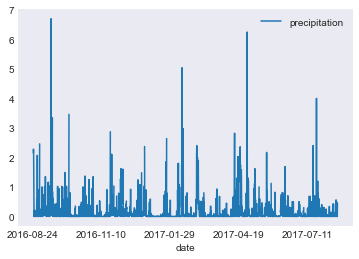

In [129]:
rain_last_year.plot()

In [130]:
## Statistics for last years rain?
rain_last_year.describe()

precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

In [155]:
## temperature Statistics for the most active station last year
result = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= last_year).all()
temp_last_year = pd.DataFrame(result, columns=["date", "temperature"]).set_index("date")
temp_last_year.sort_index(inplace=True)
temp_last_year.describe()

temperature
count   351.000000
mean     73.096866
std       4.735491
min      59.000000
25%      70.000000
50%      74.000000
75%      77.000000
max      83.000000

<AxesSubplot:xlabel='date', ylabel='temperature'>

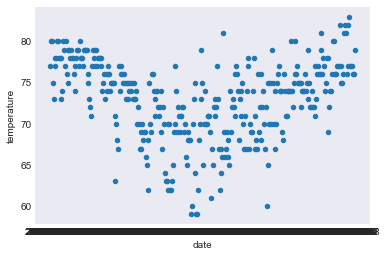

In [173]:
## plot of temperatures from one station for last year

temp_last_year.reset_index().plot(x="date",y="temperature", kind='scatter')

<AxesSubplot:ylabel='Frequency'>

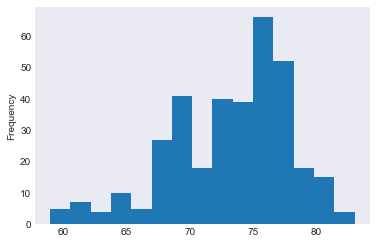

In [174]:
plt.tight_layout()
temps = temp_last_year.reset_index()['temperature']
temps.plot.hist(bins=15)

In [169]:
help(pd.DataFrame.plot.hist)

Help on function hist in module pandas.plotting._core:

hist(self, by=None, bins=10, **kwargs)
    Draw one histogram of the DataFrame's columns.
    
    A histogram is a representation of the distribution of data.
    This function groups the values of all given Series in the DataFrame
    into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
    This is useful when the DataFrame's Series are in a similar scale.
    
    Parameters
    ----------
    by : str or sequence, optional
        Column in the DataFrame to group by.
    bins : int, default 10
        Number of histogram bins to be used.
    **kwargs
        Additional keyword arguments are documented in
        :meth:`DataFrame.plot`.
    
    Returns
    -------
    class:`matplotlib.AxesSubplot`
        Return a histogram plot.
    
    See Also
    --------
    DataFrame.hist : Draw histograms per DataFrame's Series.
    Series.hist : Draw a histogram with Series' data.
    
    Examples
    --------
    When

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge